<a href="https://colab.research.google.com/github/jabir-al-nahian/Text_Summarization_with_Transformers/blob/main/Text_Summarization_with_Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import time
import re
import pickle

In [ ]:
df=pd.read_excel("/content/text_summarization (2).xlsx")
df.head()

,Text,Summary
0,"আমি জানি আমার এই লেখা,টির জন্য আমাকে অনেক গালম...",বাংলাদেশে কোচিং বানিজ্য বন্ধ এখন সময়ের দাবি
1,একটা ভাষায় তুলনামূলক ভাবে অনেক বেশি মানুষ কথা ...,বাংলা ভাষার প্রযুক্তি নিয়ে আমাদের আরো অনেক বেশ...
2,আমাদের ফেব্রুয়ারি মাসটি ভাষার মাস। এর বাইরেও ত...,যদি শিশুরা বই পড়ার অভ্যাস করে তাহলে সারা জীবনে...
3,আমাকে যদি কেউ কখনো জিজ্ঞেস করে বাংলাদেশের সবচে...,বাংলাদেশে সব স্তরে নারীর ক্ষমতায়নের জন্য আরও অ...
4,মানুষের মুখ খুব শক্তিশালী এক জিনিস। মানুষ যেটা...,"ভালো কথা বল, নয়ত চুপ থাকো"


In [ ]:
document = df['Text']
summary = df['Summary']

In [ ]:
document[30], summary[30]

('"গতরাতে আব্বু তার ফোন নিয়ে আমার কাছে এসে বললো, "বাবা, ফেইসবুকে কোন একটা পোস্টে কিভাবে প্রাইভেসি সেট করে, একটু দেখায় দেও তো"আমি তাকে একবার দেখালাম প্রসেসটা ... কিন্তু বয়সের কারণে খালি চোখে আব্বু ডান পাশের ছোট ডট দেখতে পাচ্ছিলো না ... বারবার বলতেছিলো, "কই? কই ক্লিক করবো?"প্রায় ৫ বার দেখানোর পরেও যখন আব্বু উল্টাপাল্টা ক্লিক করতেসিলো, প্রচণ্ড মেজাজ খারাপ হইলো ... আমি বেখেয়ালে একটু রাগের সুরে বললাম, "এই সিম্পল জিনিস পারতেছো না? ধুরর"এই কথাটা বলার সাথে সাথে আব্বুর মুখটা শুকনা হয়ে গেলো ... আমি সাথে সাথে বুঝতে পারলাম, মানুষটাকে আমি ছোট্ট একটা কথা দিয়ে অনেক বড় একটা কষ্ট দিয়ে ফেলসি ... \'সরি\' বলে আবার ভালোভাবে প্রসেসটা বুঝায় বললাম !!আমার ধারণা, নিজের অজান্তেই খুব ছোট ছোট কথা দিয়ে আমরা মানুষকে আঘাত করে ফেলি ... পৃথিবীতে সবাই সবকিছু পারে না ... কারো না পারা নিয়ে তার সাথে অপমানের সুরে কথা বললে সে নিজের ভেতর খুব ছোট বোধ করে ... আমার কোন অধিকার নেই কাউকে অপমান করার, কাউকে ছোট করার !!যে বাবার প্রতি আমি বিরক্ত হলাম কারণ সে সামান্য ফোন চালাতে পারছে না, সেই বাবাই ছোট বেলায় কখনো বিরক্ত হয় নি যখন আমি সা

In [ ]:
len(df['Text'])

1026

In [ ]:
c1 = dict(df.Text.str.split(expand=True).stack().value_counts())
c1 = dict(sorted(c1.items(), key=lambda x: x[1], reverse=True))
c2 = dict(df.Summary.str.split(expand=True).stack().value_counts())
c2 = dict(sorted(c2.items(), key=lambda x: x[1], reverse=True))

In [ ]:
c2

{'না': 154,
 'মানুষ': 70,
 'জন্য': 63,
 'করে': 62,
 'ভালোবাসা': 62,
 'না।': 56,
 'অনেক': 54,
 'করা': 48,
 'মানুষের': 45,
 'করতে': 45,
 'আর': 45,
 'হবে': 44,
 'সব': 43,
 'ভালো': 42,
 'হয়': 39,
 'কিছু': 39,
 'যে': 38,
 'সাথে': 34,
 'এই': 33,
 'কষ্ট': 32,
 'এর': 32,
 'থেকে': 32,
 'নিজের': 32,
 'ভালোবাসার': 32,
 'কোনো': 31,
 'সময়': 30,
 'ও': 30,
 'করার': 28,
 'কথা': 28,
 'হতে': 28,
 'যায়': 28,
 ',': 28,
 'তার': 26,
 'নেই': 26,
 'একটি': 25,
 'উচিত': 25,
 'থাকে': 25,
 'হয়ে': 24,
 'আমাদের': 24,
 'কেউ': 24,
 'কারো': 24,
 'প্রতি': 24,
 'পারে': 23,
 'প্রেম': 21,
 '।': 21,
 'আমরা': 21,
 'মানুষকে': 21,
 'উপর': 20,
 'একজন': 20,
 'যায়।': 20,
 'জীবন': 20,
 'এক': 20,
 'হবে।': 19,
 'হয়।': 19,
 'নিজেকে': 19,
 'কাউকে': 19,
 'মন': 19,
 'থাকা': 18,
 'একটা': 18,
 'কখনো': 18,
 'তাকে': 18,
 'এবং': 18,
 'নিয়ে': 18,
 'এখন': 18,
 'করোনা': 17,
 'এমন': 17,
 'তা': 16,
 'চলে': 16,
 'সে': 16,
 'জীবনে': 16,
 'মধ্যে': 16,
 'মতো': 16,
 'শুধু': 15,
 'যাবে': 15,
 'সবার': 15,
 'হচ্ছে': 15,
 'মানে': 15,
 'গুলো': 15,
 'বেশি'

In [ ]:
d1 = pd.DataFrame(c1.items(), columns=['Words', 'Count'])
d1 = d1.head(20)
d1

,Words,Count
0,না,1532
1,করে,1516
2,আমার,1143
3,আর,1107
4,আমি,1105
5,এই,922
6,তার,879
7,না।,770
8,একটা,765
9,যে,753


In [ ]:
d2 = pd.DataFrame(c2.items(), columns=['Words', 'Count'])
d2 = d2.head(20)
d2

,Words,Count
0,না,154
1,মানুষ,70
2,জন্য,63
3,করে,62
4,ভালোবাসা,62
5,না।,56
6,অনেক,54
7,করা,48
8,মানুষের,45
9,করতে,45


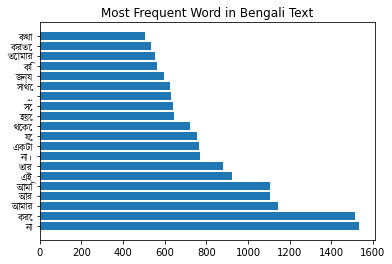

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
prop = fm.FontProperties(fname='/content/kalpurush.ttf')
plt.barh(d1.Words,d1.Count)
plt.yticks(d1.Words,fontproperties=prop)
plt.title('Most Frequent Word in Bengali Text')
plt.show()

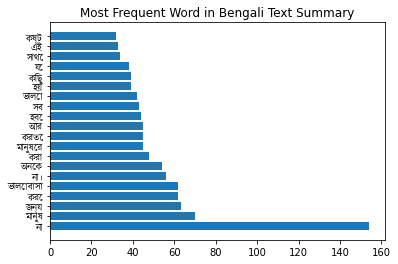

In [ ]:
plt.barh(d2.Words,d2.Count)
plt.yticks(d2.Words,fontproperties=prop)
plt.title('Most Frequent Word in Bengali Text Summary')
plt.show()

In [ ]:
summary = summary.apply(lambda x: '<go> ' + str(x) + ' <stop>')
summary.head()

0    <go> বাংলাদেশে কোচিং বানিজ্য বন্ধ এখন সময়ের দা...
1    <go> বাংলা ভাষার প্রযুক্তি নিয়ে আমাদের আরো অনে...
2    <go> যদি শিশুরা বই পড়ার অভ্যাস করে তাহলে সারা ...
3    <go> বাংলাদেশে সব স্তরে নারীর ক্ষমতায়নের জন্য ...
4                <go> ভালো কথা বল, নয়ত চুপ থাকো <stop>
Name: Summary, dtype: object

In [ ]:
# since < and > from default tokens cannot be removed
filters = '!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n'
oov_token = '<unk>'

In [ ]:
document_tokenizer = tf.keras.preprocessing.text.Tokenizer(oov_token=oov_token)
summary_tokenizer = tf.keras.preprocessing.text.Tokenizer(filters=filters, oov_token=oov_token)

In [ ]:
document_tokenizer.fit_on_texts(document)
summary_tokenizer.fit_on_texts(summary)

In [ ]:
inputs = document_tokenizer.texts_to_sequences(document)
targets = summary_tokenizer.texts_to_sequences(summary)

In [ ]:
summary_tokenizer.texts_to_sequences(["বাংলাদেশে কোচিং বানিজ্য বন্ধ এখন সময়ের দাবি"])

[[153, 547, 942, 379, 61, 134, 548]]

In [ ]:
summary_tokenizer.sequences_to_texts([[153, 547, 942, 379, 61, 134, 548]])

['বাংলাদেশে কোচিং বানিজ্য বন্ধ এখন সময়ের দাবি']

In [ ]:
encoder_vocab_size = len(document_tokenizer.word_index) + 1
decoder_vocab_size = len(summary_tokenizer.word_index) + 1

encoder_vocab_size, decoder_vocab_size

(23995, 2814)

In [ ]:
document_lengths = pd.Series([len(x) for x in document])
summary_lengths = pd.Series([len(x) for x in summary])

In [ ]:
document_lengths.describe()

count    1026.000000
mean      814.735867
std       893.202858
min        42.000000
25%       257.500000
50%       524.000000
75%      1029.250000
max      8262.000000
dtype: float64

In [ ]:
summary_lengths.describe()

count    1026.000000
mean       54.670565
std        23.110480
min        15.000000
25%        41.000000
50%        51.000000
75%        63.000000
max       462.000000
dtype: float64

In [ ]:
encoder_maxlen = 250
decoder_maxlen = 75

In [ ]:
inputs = tf.keras.preprocessing.sequence.pad_sequences(inputs, maxlen=encoder_maxlen, padding='post', truncating='post')
targets = tf.keras.preprocessing.sequence.pad_sequences(targets, maxlen=decoder_maxlen, padding='post', truncating='post')

In [ ]:
inputs = tf.cast(inputs, dtype=tf.int32)
targets = tf.cast(targets, dtype=tf.int32)

In [ ]:
BUFFER_SIZE = 2000
BATCH_SIZE = 8

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((inputs, targets)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [ ]:
def get_angles(position, i, d_model):
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model))
    return position * angle_rates

In [ ]:
def positional_encoding(position, d_model):
    angle_rads = get_angles(
        np.arange(position)[:, np.newaxis],
        np.arange(d_model)[np.newaxis, :],
        d_model
    )

    # apply sin to even indices in the array; 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])

    # apply cos to odd indices in the array; 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

    pos_encoding = angle_rads[np.newaxis, ...]

    return tf.cast(pos_encoding, dtype=tf.float32)

In [ ]:
def create_padding_mask(seq):
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
    return seq[:, tf.newaxis, tf.newaxis, :]

In [ ]:
def create_look_ahead_mask(size):
    mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
    return mask

In [ ]:
def scaled_dot_product_attention(q, k, v, mask):
    matmul_qk = tf.matmul(q, k, transpose_b=True)

    dk = tf.cast(tf.shape(k)[-1], tf.float32)
    scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

    if mask is not None:
        scaled_attention_logits += (mask * -1e9)

    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)

    output = tf.matmul(attention_weights, v)
    return output, attention_weights

In [ ]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % self.num_heads == 0

        self.depth = d_model // self.num_heads

        self.wq = tf.keras.layers.Dense(d_model)
        self.wk = tf.keras.layers.Dense(d_model)
        self.wv = tf.keras.layers.Dense(d_model)

        self.dense = tf.keras.layers.Dense(d_model)

    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, v, k, q, mask):
        batch_size = tf.shape(q)[0]

        q = self.wq(q)
        k = self.wk(k)
        v = self.wv(v)

        q = self.split_heads(q, batch_size)
        k = self.split_heads(k, batch_size)
        v = self.split_heads(v, batch_size)

        scaled_attention, attention_weights = scaled_dot_product_attention(
            q, k, v, mask)

        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.d_model))
        output = self.dense(concat_attention)

        return output, attention_weights

In [ ]:
def point_wise_feed_forward_network(d_model, dff):
    return tf.keras.Sequential([
        tf.keras.layers.Dense(dff, activation='relu'),
        tf.keras.layers.Dense(d_model)
    ])

In [ ]:
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(EncoderLayer, self).__init__()

        self.mha = MultiHeadAttention(d_model, num_heads)
        self.ffn = point_wise_feed_forward_network(d_model, dff)

        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, x, training, mask):
        attn_output, _ = self.mha(x, x, x, mask)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)

        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)

        return out2

In [ ]:
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(DecoderLayer, self).__init__()

        self.mha1 = MultiHeadAttention(d_model, num_heads)
        self.mha2 = MultiHeadAttention(d_model, num_heads)

        self.ffn = point_wise_feed_forward_network(d_model, dff)

        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)
        self.dropout3 = tf.keras.layers.Dropout(rate)


    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):
        attn1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask)
        attn1 = self.dropout1(attn1, training=training)
        out1 = self.layernorm1(attn1 + x)

        attn2, attn_weights_block2 = self.mha2(enc_output, enc_output, out1, padding_mask)
        attn2 = self.dropout2(attn2, training=training)
        out2 = self.layernorm2(attn2 + out1)

        ffn_output = self.ffn(out2)
        ffn_output = self.dropout3(ffn_output, training=training)
        out3 = self.layernorm3(ffn_output + out2)

        return out3, attn_weights_block1, attn_weights_block2

In [ ]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, maximum_position_encoding, rate=0.1):
        super(Encoder, self).__init__()

        self.d_model = d_model
        self.num_layers = num_layers

        self.embedding = tf.keras.layers.Embedding(input_vocab_size, d_model)
        self.pos_encoding = positional_encoding(maximum_position_encoding, self.d_model)

        self.enc_layers = [EncoderLayer(d_model, num_heads, dff, rate) for _ in range(num_layers)]

        self.dropout = tf.keras.layers.Dropout(rate)

    def call(self, x, training, mask):
        seq_len = tf.shape(x)[1]

        x = self.embedding(x)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]

        x = self.dropout(x, training=training)

        for i in range(self.num_layers):
            x = self.enc_layers[i](x, training, mask)

        return x

In [ ]:
class Decoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, target_vocab_size, maximum_position_encoding, rate=0.1):
        super(Decoder, self).__init__()

        self.d_model = d_model
        self.num_layers = num_layers

        self.embedding = tf.keras.layers.Embedding(target_vocab_size, d_model)
        self.pos_encoding = positional_encoding(maximum_position_encoding, d_model)

        self.dec_layers = [DecoderLayer(d_model, num_heads, dff, rate) for _ in range(num_layers)]
        self.dropout = tf.keras.layers.Dropout(rate)

    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):
        seq_len = tf.shape(x)[1]
        attention_weights = {}

        x = self.embedding(x)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]

        x = self.dropout(x, training=training)

        for i in range(self.num_layers):
            x, block1, block2 = self.dec_layers[i](x, enc_output, training, look_ahead_mask, padding_mask)

            attention_weights['decoder_layer{}_block1'.format(i+1)] = block1
            attention_weights['decoder_layer{}_block2'.format(i+1)] = block2

        return x, attention_weights

In [ ]:
class Transformer(tf.keras.Model):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, target_vocab_size, pe_input, pe_target, rate=0.1):
        super(Transformer, self).__init__()

        self.encoder = Encoder(num_layers, d_model, num_heads, dff, input_vocab_size, pe_input, rate)

        self.decoder = Decoder(num_layers, d_model, num_heads, dff, target_vocab_size, pe_target, rate)

        self.final_layer = tf.keras.layers.Dense(target_vocab_size)

    def call(self, inp, tar, training, enc_padding_mask, look_ahead_mask, dec_padding_mask):
        enc_output = self.encoder(inp, training, enc_padding_mask)

        dec_output, attention_weights = self.decoder(tar, enc_output, training, look_ahead_mask, dec_padding_mask)

        final_output = self.final_layer(dec_output)

        return final_output, attention_weights

In [ ]:
# hyper-params
num_layers = 4
d_model = 128
dff = 512
num_heads = 8
EPOCHS = 70

In [ ]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()

        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)

        self.warmup_steps = warmup_steps

    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [ ]:
learning_rate = CustomSchedule(d_model)
optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

In [ ]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_sum(loss_)/tf.reduce_sum(mask)

In [ ]:
train_loss = tf.keras.metrics.Mean(name='train_loss')

In [ ]:
transformer = Transformer(
    num_layers,
    d_model,
    num_heads,
    dff,
    encoder_vocab_size,
    decoder_vocab_size,
    pe_input=encoder_vocab_size,
    pe_target=decoder_vocab_size,
)

In [ ]:
def create_masks(inp, tar):
    enc_padding_mask = create_padding_mask(inp)
    dec_padding_mask = create_padding_mask(inp)

    look_ahead_mask = create_look_ahead_mask(tf.shape(tar)[1])
    dec_target_padding_mask = create_padding_mask(tar)
    combined_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask)

    return enc_padding_mask, combined_mask, dec_padding_mask

In [ ]:
checkpoint_path = "checkpoints"
ckpt = tf.train.Checkpoint(transformer=transformer, optimizer=optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print ('Latest checkpoint restored!!')

In [ ]:
@tf.function
def train_step(inp, tar):
    tar_inp = tar[:, :-1]
    tar_real = tar[:, 1:]

    enc_padding_mask, combined_mask, dec_padding_mask = create_masks(inp, tar_inp)

    with tf.GradientTape() as tape:
        predictions, _ = transformer(
            inp, tar_inp,
            True,
            enc_padding_mask,
            combined_mask,
            dec_padding_mask
        )
        loss = loss_function(tar_real, predictions)

    gradients = tape.gradient(loss, transformer.trainable_variables)
    optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))

    train_loss(loss)

In [ ]:
for epoch in range(EPOCHS):
    start = time.time()

    train_loss.reset_states()

    for (batch, (inp, tar)) in enumerate(dataset):
        train_step(inp, tar)

        # 55k samples
        # we display 3 batch results -- 0th, middle and last one (approx)
        # 55k / 64 ~ 858; 858 / 2 = 429
        if batch % 8 == 0:
            print ('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1, batch, train_loss.result()))

    if (epoch + 1) % 5 == 0:
        ckpt_save_path = ckpt_manager.save()
        print ('Saving checkpoint for epoch {} at {}'.format(epoch+1, ckpt_save_path))

    print ('Epoch {} Loss {:.4f}'.format(epoch + 1, train_loss.result()))

    print ('Time taken for 1 epoch: {} secs\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 7.9428
Epoch 1 Batch 8 Loss 7.9584
Epoch 1 Batch 16 Loss 7.9470
Epoch 1 Batch 24 Loss 7.9375
Epoch 1 Batch 32 Loss 7.9219
Epoch 1 Batch 40 Loss 7.9028
Epoch 1 Batch 48 Loss 7.8871
Epoch 1 Batch 56 Loss 7.8692
Epoch 1 Batch 64 Loss 7.8532
Epoch 1 Batch 72 Loss 7.8378
Epoch 1 Batch 80 Loss 7.8200
Epoch 1 Batch 88 Loss 7.8021
Epoch 1 Batch 96 Loss 7.7860
Epoch 1 Batch 104 Loss 7.7694
Epoch 1 Batch 112 Loss 7.7541
Epoch 1 Batch 120 Loss 7.7419
Epoch 1 Batch 128 Loss 7.7261
Epoch 1 Loss 7.7261
Time taken for 1 epoch: 20.604976415634155 secs

Epoch 2 Batch 0 Loss 7.5124
Epoch 2 Batch 8 Loss 7.4641
Epoch 2 Batch 16 Loss 7.4441
Epoch 2 Batch 24 Loss 7.4296
Epoch 2 Batch 32 Loss 7.4279
Epoch 2 Batch 40 Loss 7.4223
Epoch 2 Batch 48 Loss 7.4265
Epoch 2 Batch 56 Loss 7.4156
Epoch 2 Batch 64 Loss 7.4060
Epoch 2 Batch 72 Loss 7.3924
Epoch 2 Batch 80 Loss 7.3833
Epoch 2 Batch 88 Loss 7.3754
Epoch 2 Batch 96 Loss 7.3687
Epoch 2 Batch 104 Loss 7.3591
Epoch 2 Batch 112 Loss 7.3490
E

In [ ]:
def evaluate(input_document):
    input_document = document_tokenizer.texts_to_sequences([input_document])
    input_document = tf.keras.preprocessing.sequence.pad_sequences(input_document, maxlen=encoder_maxlen, padding='post', truncating='post')

    encoder_input = tf.expand_dims(input_document[0], 0)

    decoder_input = [summary_tokenizer.word_index["<go>"]]
    output = tf.expand_dims(decoder_input, 0)

    for i in range(decoder_maxlen):
        enc_padding_mask, combined_mask, dec_padding_mask = create_masks(encoder_input, output)

        predictions, attention_weights = transformer(
            encoder_input,
            output,
            False,
            enc_padding_mask,
            combined_mask,
            dec_padding_mask
        )

        predictions = predictions[: ,-1:, :]
        predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

        if predicted_id == summary_tokenizer.word_index["<stop>"]:
            return tf.squeeze(output, axis=0), attention_weights

        output = tf.concat([output, predicted_id], axis=-1)

    return tf.squeeze(output, axis=0), attention_weights

In [ ]:
def summarize(input_document):
    summarized = evaluate(input_document=input_document)[0].numpy()
    summarized = np.expand_dims(summarized[1:], 0)  # not printing <go> token
    return summary_tokenizer.sequences_to_texts(summarized)[0]  # since there is just one translated document

In [ ]:
output = []
for i in df.Text:
  output.append(summarize(i))

In [ ]:
reference = []
for i in df.Summary:
  reference.append(i)

In [ ]:
reference

['বাংলাদেশে কোচিং বানিজ্য বন্ধ এখন সময়ের দাবি',
 'বাংলা ভাষার প্রযুক্তি নিয়ে আমাদের আরো অনেক বেশি আগ্রহী ও গবেষণায় মনোযোগ দিতে হবে',
 'যদি শিশুরা বই পড়ার অভ্যাস করে তাহলে সারা জীবনের জন্য আমরা তাদের নিয়ে নিশ্চিন্ত থাকতে পারব।',
 'বাংলাদেশে সব স্তরে নারীর ক্ষমতায়নের জন্য আরও অনেক কাজ করে যেতে হবে।',
 'ভালো কথা বল, নয়ত চুপ থাকো',
 'সমাবর্তনের মাধ্যমে শিক্ষা জীবনের শেষ হলেও সফলতা ও ব্যর্থজীবনের হিসাব গণনা শুরু হয়ে এখান থেকেই',
 'বাবার কষ্টার্জিত অর্থের মূল্য দিতে শিখো',
 'নিজের ভুলের জন্য অনুতপ্ত হওয়া উচিত',
 'দুশমনের শরণ ক্ষতির কারণ',
 'অনেক গুলো গুনোবানহীন সন্তানের চেয়ে একটি গুনবান পূর্ন সন্তানই যথেষ্ট',
 'মানুষ যখন বিপদে পরে তখন সমাজের তুচ্ছ মানুষরাও তাকে অপদস্ত করে',
 'কারো পৌষ মাস,আবার কারো সর্বনাশ',
 'আমাদের সমাজেও এমন অনেক লোক আছে যারা মুখে বলে এক কথা কিন্তু করে আরেক',
 'উপকারীর উপকার স্বীকার করতে হবে ',
 'দিনশেষে এই পৃথিবীর বেশিরভাগ মানুষ কেউ কাউকে বুঝে না',
 'যেদিন মিথ্যেগুলোকে সত্যি সত্যি মিথ্যে মনে হবে, সেদিন সব শেষ হয়ে যাবে',
 'একটা মানুষ যখন বিশ্বাস করতে শুরু করে যে সে আমার স

In [ ]:
summarize("মানুষের মুখ খুব শ ক্তিশালী এক জিনিস। মানুষ যেটা বলে সেটার একটা প্রভাব আছে।অভিজ্ঞতা থেকে দেখেছি একটা ছেলেকে ক্ষেপানোর জন্য বলা হতো, অমুক মেয়ের সাথে তুই প্রেম করিস। কদিন পরে সত্যি সত্যি তারা প্রেম করা শুরু করে দিয়েছিল।স্বামী-স্ত্রীর মনোমালিন্যর সময় হয়ত স্ত্রী আফসোস করে বলল, আমি পুরোনো হয়ে গেছি - এখন তো আর আমাকে ভালো লাগবে না।সত্যি সত্যি দেখা যাবে কদিন পরে স্বামীর ঠিক ওই জিনিসটাই মনে হতে থাকবে। অথচ হয়ত সে এ ব্যাপারে আগে ভাবেইনি।একটা ছেলেকে পরিবারের সবাই বলে, তুই কোনো কাজের না - দেখা যাবে ছেলেটা আসলেই কিছু করতে পারছে না।এজন্য রসুল সাল্লাল্লাহু আলাইহি ওয়া সাল্লাম বলেছেন, হয় ভালো কথা বলো নয়ত চুপ থাক।আমাদের জীবনের বহু ভালো পরিস্থিতি খারাপ থেকে খারাপ হয়েছে শুধুমাত্র আমাদের কথার কারণে।জিহবা সাবধান ভাইয়েরা। মুখ সাবধান বোনেরা।রসুল সাল্লাল্লাহু আলাইহি ওয়া সাল্লামের কথাটাকে দাম দিই - সংসারে শান্তি আসবে, আয়ে বারাকাহ আসবে।")

'ভালো কথা বল নয়ত চুপ থাকো'

In [ ]:
summarize("ক্লাসে সবচেয়ে দূর্বল ছেলেটি কাল সমাবর্তনে এসেছিল সবার চেয়ে হাই পজিশনের জব নিয়ে। বারবার প্রেমে ব্যর্থ হওয়া মেয়েটি এসেছিল একটি সুন্দর ছোট্ট পরিবার নিয়ে। কারো কাছে পাত্তা না পাওয়া, তোকে দিয়ে কিছু হবে না বলা ছেলেটিই সবচেয়ে সুন্দর বউ নিয়ে এসেছে। পড়াশোনার খরচ যোগাতে টিউশন করে হাত খরচ চালানো মেয়েটি কাল গাড়ি দিয়ে ক্যাম্পাসে এসেছিল। ক্লাসের সবচেয়ে সাক্সেস্ফুল ছেলেটি ডিপ্রেশনে ভুগছে জব না পাওয়ায়। ডিপার্টমেন্টের হার্টথ্রোব মেয়েটির চোখে নিচে কালি বিয়ে হচ্ছে না বয়স হয়ে গেছে।এভাবেই সময়ের সাথে বদলে যায় মানুষের জীবনে ইকুয়েশন। আসলে সমাবর্তনের মাধ্যমে শিক্ষা জীবনের শেষ হলেও সফলতা ও ব্যর্থজীবনের হিসাব গণনা শুরু হয়ে এখান থেকেই।তাই ঘৃণা, হিংসা, কম্পিটিশন বাদ দিয়ে জীবনটাকে বাচা উচিত সম্পূর্ণ স্বাদ ও ভালবাসা নিয়ে। কখন জীবনের কোন মোড় দেখায় কোন নিশ্চয়তা নেই, তাই কোন মুহূর্তের জন্য যাতে আফসোস না থাকে।")

'সমাবর্তনের মাধ্যমে শিক্ষা জীবনের শেষ হলেও সফলতা ও ব্যর্থজীবনের হিসাব গণনা শুরু হয়ে এখান থেকেই'

In [ ]:
summarize("ইতালির প্রধানমন্ত্রী জুসেপ্পে কন্তে বলেছেন, একেকজন বাংলাদেশি একেকটা ভাইরাস বোমা। অনেক বাংলাদেশি ভাই সেটাকে শেয়ার করে দেশকে পরোক্ষভাবে তিরস্কার করছেন। অথচ কন্তে সাহেবকে বলা দরকার, আমাদের অসচেতনতা নিয়ে এমন ঢালাও মন্তব্য করার আগে আপনার অগ্রজ শাসকদের দিকে তাকান। নিরো সাহেবের দিকে তাকান।আপনি কী জানেন না? রোম যখন পুড়ছিলো, নিরো তখন সাহেব বাঁশি বাজাচ্ছিলেন।আর আমরা একটু বাঁশি বাজালেই দোষ...")

'সকলের প্রতি সহ মর্মিতা ইসলাম আমাদের শিক্ষা দেয়'

In [ ]:
summarize("মুক্তির সারথি বাংলাদেশ সাধারণ ছাত্র অধিকার সংরক্ষণ পরিষদ আমাদের দেশে স্বাধীনতার পর থেকে চলমান অসুস্থ ধারার রাজনীতি এখনো বহাল তবিয়তে চলছে। এই অবস্থা থেকে বের হয়ে আসতে না পারলে দেশ ও জাতি আরো গভীর অন্ধকারে নিমজ্জিত হবে। একটি দেশের প্রকৃত উন্নয়ন নির্ভর করে সেদেশের রাজনৈতিক স্থিতিশীলতার উপর। দেশে দৃশ্যমান উন্নয়ন অনেক কিন্তু প্রকৃত উন্নয়ন কতটা তা যতেষ্ঠ প্রশ্নের মুখোমুখি আজ। উল্টো দেশের স্তম্ভ গুলো দিনকে দিন দুর্বল থেকে দুর্বলতর করা হচ্ছে। আইন বিচার এবং শাসন বিভাগের অবস্থা বড্ড নাজুক। এখন অনেক সময় দেখি মহান জাতীয় সংসদ কোরাম সংকটে ভুগে। সাংবিধানিক প্রতিষ্ঠান গুলো তাদের স্বকীয়তা হারাচ্ছে অনবরত। বাংলাদেশ নির্বাচন কমিশন, দুর্নীতি দমন কমিশন সহ সাংবিধানিক প্রতিষ্ঠানগুলোকে এখন আর কার্যকর তেমন কোন পদক্ষেপ নিতে দেখি না আর আমরা।রাষ্ট্রের চতুর্থ স্তম্ভ গণমাধ্যম, এই গণমাধ্যমের অবস্থা যে খুব একটা ভাল তাও কিন্তু নয়। তবুও বলবো সব মিলিয়ে এগিয়ে যাচ্ছে প্রিয় স্বদেশ। আগামীতে গণমানুষের প্রত্যাশা পূরণে কাজ করে যাবে ছাত্রসমাজের প্রাণের স্পন্দন বাংলাদেশ সাধারণ ছাত্র অধিকার সংরক্ষণ পরিষদ দেশ ব্যাপি কমিটি হালনাগাদের কার্যক্রম চলমান রয়েছে, আপনি আছেন তো আপনার জেলার কমিটিতে....??যুক্ত না থাকলে এখনি সময় যুক্ত হওয়ার। আপনাদের হাত ধরেই পরিবর্তন আসবে ইনশাআল্লাহ।।")

'স্বাধীনতার পর থেকে চলমান অসুস্থ ধারার রাজনীতি এখনো বহাল।'

In [ ]:
!pip install rouge

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from rouge import Rouge

In [ ]:
hypothesis = "স্বাধীনতার পর থেকে চলমান অসুস্থ ধারার রাজনীতি এখনো বহাল।"
reference = "স্বাধীনতার পর থেকে চলমান অসুস্থ ধারার রাজনীতি এখনো বহাল।"

rouge = Rouge()
scores = rouge.get_scores(hypothesis, reference)
print(scores)

[{'rouge-1': {'r': 1.0, 'p': 1.0, 'f': 0.999999995}, 'rouge-2': {'r': 1.0, 'p': 1.0, 'f': 0.999999995}, 'rouge-l': {'r': 1.0, 'p': 1.0, 'f': 0.999999995}}]


In [ ]:
import nltk
BLEUscore = nltk.translate.bleu_score.sentence_bleu([reference], hypothesis)
print(BLEUscore)


1.0
